In [128]:
import matplotlib.pyplot as plt
import numpy as np

classes = ['Bark', 'Motorcycle', 'Writing', 'Female_speech_and_woman_speaking', 'Tap', 'Child_speech_and_kid_speaking', 'Screaming', 'Meow', 'Scissors', 'Fart', 'Car_passing_by', 'Harmonica', 'Sink_(filling_or_washing)', 'Burping_and_eructation', 'Slam', 'Drawer_open_or_close', 'Cricket', 'Hiss', 'Frying_(food)', 'Sneeze', 'Chink_and_clink', 'Fill_(with_liquid)', 'Crowd', 'Marimba_and_xylophone', 'Sigh', 'Accordion', 'Electric_guitar', 'Cupboard_open_or_close', 'Bicycle_bell', 'Waves_and_surf', 'Stream', 'Bus', 'Toilet_flush', 'Trickle_and_dribble', 'Tick-tock', 'Keys_jangling', 'Acoustic_guitar', 'Finger_snapping', 'Cheering', 'Race_car_and_auto_racing', 'Bass_guitar', 'Yell', 'Water_tap_and_faucet', 'Run', 'Traffic_noise_and_roadway_noise', 'Crackle', 'Skateboard', 'Glockenspiel', 'Computer_keyboard', 'Whispering', 'Zipper_(clothing)', 'Microwave_oven', 'Bathtub_(filling_or_washing)', 'Male_speech_and_man_speaking', 'Gong', 'Shatter', 'Strum', 'Bass_drum', 'Dishes_and_pots_and_pans', 'Accelerating_and_revving_and_vroom', 'Male_singing', 'Gurgling', 'Walk_and_footsteps', 'Printer', 'Cutlery_and_silverware', 'Chirp_and_tweet', 'Clapping', 'Hi-hat', 'Raindrop', 'Gasp', 'Buzz', 'Drip', 'Chewing_and_mastication', 'Squeak', 'Female_singing', 'Church_bell', 'Mechanical_fan', 'Purr', 'Applause', 'Knock']
pruning_percentages = [0.5, 0.6, 0.7, 0.8, 0.9]

In [129]:
baseline = [0.8952380952380953,0.6638825324180015,0.630531462585034,0.7888888888888889,0.6429886444506328,0.8186274509803921,0.7152777777777777,0.7888888888888889,0.43758680555555546,0.8106508875739645,0.9444444444444444,0.6912501059052784,0.5290064102564103,0.7428700828157349,0.6300438187881752,0.7529411764705882,0.9545454545454546,0.6188453159041395,0.4184093684093684,0.9033333333333333,0.6615934065934065,0.7419687592101385,0.8167572463768117,0.9,0.7177083333333334,1.0,0.8103174603174603,0.59533621140764,0.9111111111111112,0.9736842105263158,0.8333333333333334,0.6471012985211768,0.8858024691358025,0.8428571428571429,0.6792929292929292,0.9583333333333334,0.9313725490196079,0.8881944444444444,0.8730158730158731,0.5227272727272727,0.9391304347826087,0.4427083333333333,0.5823529411764705,0.8480392156862745,0.7641369047619048,0.6525000000000001,0.8662280701754387,1.0,0.75,1.0,0.8916666666666666,0.7162660256410256,0.5469871794871795,0.8371212121212122,0.8958333333333334,0.7251322751322751,0.96875,0.8666666666666667,0.8460606060606061,0.6508907758907759,0.9204545454545454,0.6132539682539682,0.37294973544973536,0.28827160493827164,0.5082506203473944,0.8794871794871795,0.6895833333333332,0.884828678946326,0.95,0.7303571428571429,0.8069444444444445,0.7282488753076988,0.5632793710918711,0.6106209150326798,0.8091666666666667,0.76019536019536,0.4936507936507937,0.8595238095238095,0.8049999999999999,0.8408333333333333]

l1_0_5 = [0.9464285714285714,0.45709266578831803,0.5606420376121464,0.7305555555555555,0.5383009994121104,0.6979129052151363,0.6597222222222222,0.7766666666666667,0.34022448843555686,0.7487179487179488,0.9629629629629631,0.7638739892261018,0.4819320997629821,0.8213304924242424,0.7563386916328092,0.7104575163398693,0.8636363636363636,0.5293141499023852,0.6079270346511726,0.7624242424242424,0.6827651515151515,0.6689560439560439,0.6721408045977012,0.95,0.6011904761904762,0.9047619047619049,0.8361111111111111,0.7897186147186146,0.8194444444444444,0.8428362573099415,0.7796296296296297,0.6990896358543417,0.6473003848003848,0.8571428571428571,0.765390749601276,0.8194444444444443,0.9264705882352942,0.8547619047619048,0.8048454469507101,0.7666666666666667,0.9444444444444444,0.6063988095238095,0.6189234585381203,0.7289504036908883,0.7916666666666667,0.617164502164502,0.7109179197994987,1.0,0.4745066495066495,0.8496732026143791,0.5515873015873017,0.6340972222222222,0.3747055576002945,0.7241735537190083,0.7697368421052632,0.6975605413105413,1.0,0.8777777777777778,0.7957741717376605,0.41459836459836447,0.7083333333333334,0.6067676767676768,0.5479166666666667,0.44411884411884417,0.5926298376213487,0.7125559625559625,0.7609126984126985,0.8719008264462809,0.6614452798663325,0.78125,0.7261396011396012,0.5970639902864968,0.4753348214285715,0.6124064171122995,0.7988095238095239,0.7542457542457542,0.7683531746031745,0.7674603174603173,0.7613352272727273,0.6707392894461861]
l1_0_6 = [0.8494897959183673,0.6029781812390508,0.43138866341991333,0.7870370370370371,0.5338026967059224,0.7632231030063847,0.4085317460317461,0.6896296296296296,0.5072916666666666,0.6209935897435896,0.8629629629629628,0.6584671141245034,0.47367311507936505,0.7195960302653399,0.6789075171428113,0.515126050420168,0.8636363636363636,0.2813746535069248,0.44175170068027214,0.8117647058823529,0.7916666666666666,0.5011410738384423,0.78203933747412,0.7583333333333333,0.6428571428571428,0.9047619047619049,0.7740970072239421,0.5194430720245938,0.7757309941520468,0.8538011695906432,0.7833333333333333,0.7344185107339862,0.7245370370370371,0.8380952380952381,0.8285123966942148,0.7013888888888888,0.9196078431372549,0.9270833333333333,0.692918192918193,0.3459821428571428,0.8893178893178892,0.5631944444444444,0.5438492063492063,0.5214249802485096,0.6569444444444446,0.613000700280112,0.7001139152454943,1.0,0.4444628647214854,0.7941176470588235,0.48211279461279455,0.4489305914673562,0.3805722489316239,0.7689393939393938,0.6746031746031745,0.5116402116402116,1.0,0.6766374749133369,0.7934865900383141,0.460753739294761,0.7271825396825397,0.46988529014844804,0.6451388888888888,0.38801742919389975,0.5460103998565536,0.6364473133703903,0.6260697032436163,0.7970075757575756,0.7339682539682539,0.3813988095238095,0.797514619883041,0.6754901960784313,0.30247926093514327,0.5197619047619048,0.7334145021645022,0.7272079772079774,0.47381535947712417,0.7333333333333333,0.7287139930300308,0.8216129032258064]
l1_0_7 = [0.8464285714285714,0.4069082208000554,0.5606068121693122,0.7541666666666668,0.5643759018759019,0.6121394503747446,0.7059027777777779,0.5961399711399712,0.569223484848485,0.7267865729753207,0.8955026455026456,0.7511280122273779,0.5122989766081871,0.6765647546897547,0.5369738105032223,0.6022408963585433,0.8333333333333333,0.45959171547406835,0.45267670950444067,0.5838095238095238,0.705448717948718,0.46276197753224396,0.6500775296827928,0.6900000000000001,0.8863636363636364,0.9047619047619049,0.7238607270865336,0.5537087912087912,0.8003968253968254,0.8026315789473685,0.7688888888888888,0.5203836144386832,0.6819785153118486,0.7428571428571429,0.7054383116883117,0.8041666666666666,0.9313725490196079,0.94375,0.8579582944288827,0.5446428571428572,0.9355555555555556,0.6197916666666666,0.5526785714285714,0.6495098039215687,0.6641369047619048,0.6120833333333333,0.6025412139828615,1.0,0.5136145104895105,0.7352941176470589,0.6964646464646465,0.5900679988616035,0.40393570245543936,0.5969696969696969,0.8410278745644598,0.7907407407407407,0.9791666666666666,0.7014757265589674,0.748139459107201,0.4335978835978836,0.7558760683760685,0.31793021306179203,0.2592487373737374,0.3328189300411523,0.5474403897988803,0.6296844181459567,0.6213702147525676,0.8355470287288469,0.7357142857142857,0.7125,0.7910052910052909,0.715686274509804,0.5260416666666667,0.38680830865041393,0.6829166666666667,0.7686202686202687,0.5590201465201465,0.7411564625850339,0.75848588863463,0.7522498334998335]
l1_0_8 = [0.9375,0.49681748989130176,0.5761904761904763,0.7152777777777777,0.3735511196622308,0.7116222557399028,0.6994047619047619,0.6853606237816764,0.5017559523809523,0.8162393162393162,0.9481481481481482,0.7362656774421481,0.4075857426303855,0.63489010989011,0.6255188439011967,0.6540346907993966,0.773088023088023,0.567929292929293,0.38611266184795595,0.7117647058823529,0.6869791666666667,0.6077152014652014,0.7528932534229144,0.9,0.7728571428571429,0.9047619047619049,0.7096420128335023,0.5308559787551385,0.790909090909091,0.8175438596491227,0.8388888888888889,0.6338385891991205,0.6550925925925926,0.7743271221532091,0.4732323232323232,0.8611111111111112,0.8832442067736186,0.9375,0.8352994227994227,0.6095238095238095,0.9044444444444444,0.3981570512820513,0.42545127375579506,0.6113445378151261,0.7968749999999999,0.625021645021645,0.674428495481127,1.0,0.6122666396103895,0.7455436720142603,0.556547619047619,0.5317234848484848,0.5532300420168066,0.6216678058783321,0.8698308270676691,0.5139779612561871,0.9583333333333334,0.8446623093681916,0.7349620427881297,0.5550294612794613,0.7592592592592592,0.49940476190476185,0.5867673992673992,0.3411038489469862,0.5699910719346977,0.606060606060606,0.6017348468622832,0.8882231404958677,0.7384126984126984,0.625,0.7217592592592593,0.6295879713176199,0.36718177655677653,0.39796296296296296,0.5328787878787878,0.704524886877828,0.4479707792207792,0.8476190476190476,0.7794041203717721,0.7426388888888888]
l1_0_9 = [0.8511904761904763,0.3512691615952485,0.428130674150411,0.8055555555555557,0.46640156484067735,0.6191240132416604,0.5381944444444444,0.5529497354497354,0.2857301939632902,0.6689291101055806,0.8807377357073096,0.6953134584713531,0.37606466290529594,0.6978448512486183,0.6039817841012002,0.5061624649859944,0.6409090909090909,0.49706879163148504,0.4959289050607835,0.5871212121212122,0.5475529100529101,0.3309680703911473,0.7272498090145149,0.7,0.59187675070028,1.0,0.7009768009768009,0.5293460965901123,0.7247863247863247,0.7144736842105263,0.8633333333333333,0.5607609710550886,0.569614336281003,0.620825721592985,0.4928734923014099,0.7251984126984127,0.8406862745098039,1.0,0.8025910364145658,0.4558531746031746,0.903125,0.549215367965368,0.43653846153846154,0.42481325863678804,0.6419642857142857,0.5717288011695907,0.5974148445056954,0.95,0.5466763815568962,0.5014705882352941,0.6176421957671957,0.2916086194578842,0.3026369727796358,0.5133477633477633,0.8001700680272109,0.45238095238095233,0.95,0.674381402679275,0.5925555555555556,0.41000383739354324,0.6493055555555555,0.3289652014652015,0.2809090909090909,0.3190035273368606,0.4495525099204029,0.6481074481074481,0.633659469185785,0.8397643767744808,0.5707940797940798,0.4510957792207792,0.5677248677248676,0.42730912877971705,0.48180712833914047,0.3512962962962963,0.5810317460317461,0.5398448043184886,0.40150375939849625,0.5805864770150484,0.7210074490089167,0.6729453144894322]

opnorm_0_5 = [0.9387755102040816,0.5526397515527951,0.7286611519607843,0.8055555555555555,0.5941003441003442,0.6838235294117647,0.7388888888888889,0.7017857142857143,0.37109374999999994,0.5879120879120878,0.8870370370370371,0.7115786512338237,0.5165849673202614,0.7109758722671459,0.7384484228473999,0.656415343915344,0.6969696969696969,0.5125035938128917,0.4968062982768865,0.427792270531401,0.8206153100775193,0.5066497604959144,0.7456349206349207,0.8699999999999999,0.7157738095238095,0.8571428571428571,0.8268213268213267,0.5596816508470643,0.7791452991452991,0.6368648894964685,0.85,0.6282601539603598,0.8078703703703703,0.875,0.5771103896103896,0.8291666666666666,0.8202046035805627,0.859375,0.8614223467164643,0.5166666666666666,0.9432098765432099,0.4193452380952381,0.6775995075449535,0.7637254901960784,0.6672580891330891,0.6321428571428572,0.791146785883628,1.0,0.6717618319180819,0.8549019607843136,0.6833333333333332,0.5199355285592497,0.40366351753251906,0.6727272727272727,0.7291366041366042,0.7757547463429817,0.9241071428571429,0.711111111111111,0.7334630148355639,0.39033916700583365,0.7685185185185185,0.5376007326007326,0.5497685185185185,0.35639730639730643,0.5961332829745268,0.6916083916083917,0.7036324786324785,0.8933566433566433,0.8121212121212121,0.706845238095238,0.7476851851851851,0.7047152194211017,0.363578869047619,0.5124098124098124,0.7168650793650794,0.767948717948718,0.6477502760397497,0.7626050420168067,0.6687979297306328,0.752]
opnorm_0_6 = [0.9642857142857143,0.44147139092791277,0.44828325269501734,0.8541666666666666,0.5541843146276223,0.6807064289130287,0.5444444444444444,0.6923015873015873,0.3780150103519668,0.6125,0.9166666666666666,0.7111083141542003,0.5171875,0.666721126169045,0.6090756302521009,0.7319327731092438,1.0,0.5637801849566555,0.6146258503401361,0.47135093167701864,0.6778273809523808,0.5614801864801864,0.7324275362318841,0.825,0.75,0.9047619047619049,0.7584541062801932,0.5970220255934542,0.7165079365079364,0.66328320802005,0.8111111111111111,0.5407419786096257,0.6185082455480937,0.7571428571428571,0.7232142857142857,0.8452380952380952,0.8897058823529411,0.8651785714285715,0.7730994152046784,0.4547619047619047,0.8819444444444445,0.6416666666666666,0.617915295488825,0.7091503267973857,0.8333333333333334,0.6745833333333333,0.7173976608187134,1.0,0.6070707070707071,0.6928104575163399,0.39315476190476195,0.5720394736842106,0.37130681818181815,0.3931818181818182,0.6744897959183673,0.55328662804153,0.953125,0.732375478927203,0.7614285714285715,0.39942810457516337,0.8452380952380952,0.5915151515151515,0.30122655122655123,0.3743827160493828,0.6516036594983963,0.6326340326340326,0.7074864498644987,0.8067493112947659,0.7101851851851853,0.32896825396825397,0.5294444444444445,0.6169934640522875,0.5530584273182957,0.5103439153439153,0.8458333333333334,0.7927350427350427,0.4180555555555555,0.7386363636363635,0.7571078431372549,0.8461133069828722]
opnorm_0_7 = [0.8678571428571429,0.5652387041773231,0.39570428471290536,0.7222222222222223,0.6177418260751594,0.6688321482439129,0.7770833333333332,0.6677777777777777,0.35784933205532116,0.7428904428904428,0.8762718762718762,0.7795503421309872,0.39619587418300656,0.6996420922507403,0.5538373391314568,0.7819693094629157,0.8863636363636364,0.5200480941323322,0.45665227629513344,0.6875886524822695,0.6481209150326797,0.5990231990231991,0.6664231601731603,0.7833333333333333,0.7604166666666666,1.0,0.7303101187311714,0.6685897435897435,0.8288888888888889,0.8912280701754386,0.7333333333333333,0.6787330316742082,0.6421729233003741,0.8035714285714286,0.493031968031968,0.888888888888889,0.8325961963732861,0.96875,0.7664240054996357,0.4256410256410257,0.9385964912280702,0.5572916666666666,0.46216804029304026,0.6274509803921567,0.8020833333333333,0.6529824561403508,0.6646086369770581,1.0,0.6734107905982906,0.8039215686274509,0.5042200854700855,0.5408909347231715,0.444858664619694,0.5827505827505828,0.7660714285714285,0.7186647173489278,0.9583333333333334,0.7832828282828284,0.7203253968253968,0.5113095238095239,0.8045634920634921,0.48471861471861466,0.39765512265512265,0.34207818930041156,0.5686895859658668,0.7116281154742694,0.7036324786324787,0.811592947815858,0.6119739519739519,0.5625,0.7321428571428572,0.5779178338001867,0.41012731481481485,0.3926299304560175,0.7491666666666668,0.8307692307692308,0.8041666666666666,0.7338624338624339,0.7289721586575133,0.8343971631205672]
opnorm_0_8 = [0.935064935064935,0.45729635182408795,0.50256947087933,0.75,0.5795951733451734,0.6830022918258213,0.6347222222222223,0.681111111111111,0.3417086385836386,0.7730769230769231,0.9037037037037037,0.6856119106119105,0.36343444271577946,0.7213347334520189,0.6432866021101316,0.5369934640522875,0.8017316017316017,0.5355206884618648,0.4934833024118738,0.5681516290726818,0.662797619047619,0.4138278388278388,0.6777529761904761,0.95,0.5,0.8928571428571429,0.6596248196248197,0.6364087301587301,0.6753036437246963,0.8032163742690057,0.7899999999999999,0.6219633307868603,0.6363797670815214,0.8142857142857143,0.5082815734989649,0.798941798941799,0.8594944609143392,0.9375,0.7775150519978107,0.41805555555555557,0.9380952380952381,0.5121297524314765,0.47395788063160943,0.718782249742002,0.7454861111111111,0.678510656010656,0.6856725146198832,1.0,0.582093253968254,0.7999999999999999,0.5189061669324827,0.42756702084147735,0.34943675605440305,0.7227272727272728,0.7996031746031746,0.5508870214752567,0.9407894736842105,0.6845238095238095,0.7402730602730602,0.39175234487734484,0.7507936507936508,0.3961904761904762,0.46855459355459356,0.2615060750509667,0.5983660130718953,0.7098457098457097,0.7178571428571429,0.8426024955436721,0.73,0.5074404761904763,0.5533317997086112,0.6516488413547236,0.3721230158730158,0.4523687423687424,0.745,0.7482905982905983,0.4444444444444444,0.7468720304086158,0.7364393526095654,0.8231792717086834]
opnorm_0_9 = [0.8375850340136054,0.38647440787028886,0.4328618685236332,0.6825396825396824,0.4340908573775693,0.637532650190878,0.36594516594516585,0.5452910052910054,0.20840861344537814,0.586080586080586,0.8367003367003368,0.6755334559524729,0.3093829358696017,0.6295157836061726,0.3648465749936338,0.4784423573350908,0.6415090757196019,0.29839144941446727,0.456129615998037,0.42274961597542243,0.5769206528765353,0.25562892437892437,0.6935869565217392,0.6833333333333333,0.38928571428571435,0.8142857142857143,0.648925518925519,0.43777082511326204,0.7217432950191571,0.6596491228070175,0.8622222222222222,0.6003742004823319,0.5078004332866064,0.40430579716294,0.5108452950558214,0.7117063492063491,0.875222816399287,1.0,0.799921682909002,0.635094169246646,0.8527458492975734,0.34986471861471863,0.3989184037828124,0.42789862356425823,0.6424278846153846,0.3903174603174603,0.6147040127542086,1.0,0.5448403996101365,0.30786647992530347,0.4970807701070859,0.20148552955665025,0.3392462294057408,0.3191558441558442,0.7690529159383441,0.4385582010582011,0.921474358974359,0.6697440087145969,0.7036496767766117,0.4547979797979799,0.5277777777777777,0.37118455074337425,0.19114835328070623,0.10136097323919821,0.5196438066954566,0.4939259458490228,0.507480014952841,0.8024104683195593,0.4105828674249727,0.4355555555555556,0.40027251331599156,0.36226224182880534,0.4342612044817927,0.20878427128427124,0.6266666666666667,0.5415896743831966,0.321379662004662,0.5882227891156463,0.656476361447589,0.5927020202020201]

l1 = [l1_0_5, l1_0_6, l1_0_7, l1_0_8, l1_0_9]
l1_lwlrap = [0.695, 0.665, 0.662, 0.654, 0.552]
opnorm = [opnorm_0_5, opnorm_0_6, opnorm_0_7, opnorm_0_8, opnorm_0_9]
opnorm_lwlrap = [0.675, 0.665, 0.661, 0.649, 0.494]

In [136]:
def plot_performance(first, second, labels, lwlrap, pruning_percentage):
    # First: baseline
    plt.figure(figsize=(6, 15))
    plt.barh(labels, first, label='Baseline')
    plt.barh(labels, second, label='Pruned Model')
    plt.ylabel('Class')
    plt.xlabel('LWLrap Score')
    plt.title(f"Performance Comparison between Baseline and {pruning_percentage}% L1 Pruned Model")
    plt.axvline(x=lwlrap, color='r', linestyle='--', label='lwlrap Pruned Model')
    plt.legend()
    plt.margins(y=0)
    plt.show()

def plot_difference(first, second, labels, pruning_percentage, top_10=False):
    # First: baseline
    score_difference = np.subtract(second, first)
    if top_10:
        plt.figure(figsize=(6, 10))

        # Sort the score differences and select the top 10
        sorted_indices = np.argsort(score_difference)
        top_10_indices = sorted_indices[:10]
        top_10_indices = top_10_indices[::-1]
        top_10_differences = score_difference[top_10_indices]
        top_10_labels = [labels[i] for i in top_10_indices]
        plt.barh(top_10_labels, top_10_differences)
    else:
        plt.figure(figsize=(6, 15))
        plt.barh(labels, score_difference)
    plt.ylabel('Class')
    plt.xlabel('LWLrap Score')
    if top_10:
        plt.title(f"Performance Comparison between Baseline and {pruning_percentage}% L1 Pruned Model (Largest differences)")
    else:
        plt.title(f"Performance Comparison between Baseline and {pruning_percentage}% L1 Pruned Model")
    plt.legend()
    plt.margins(y=0)
    plt.show()

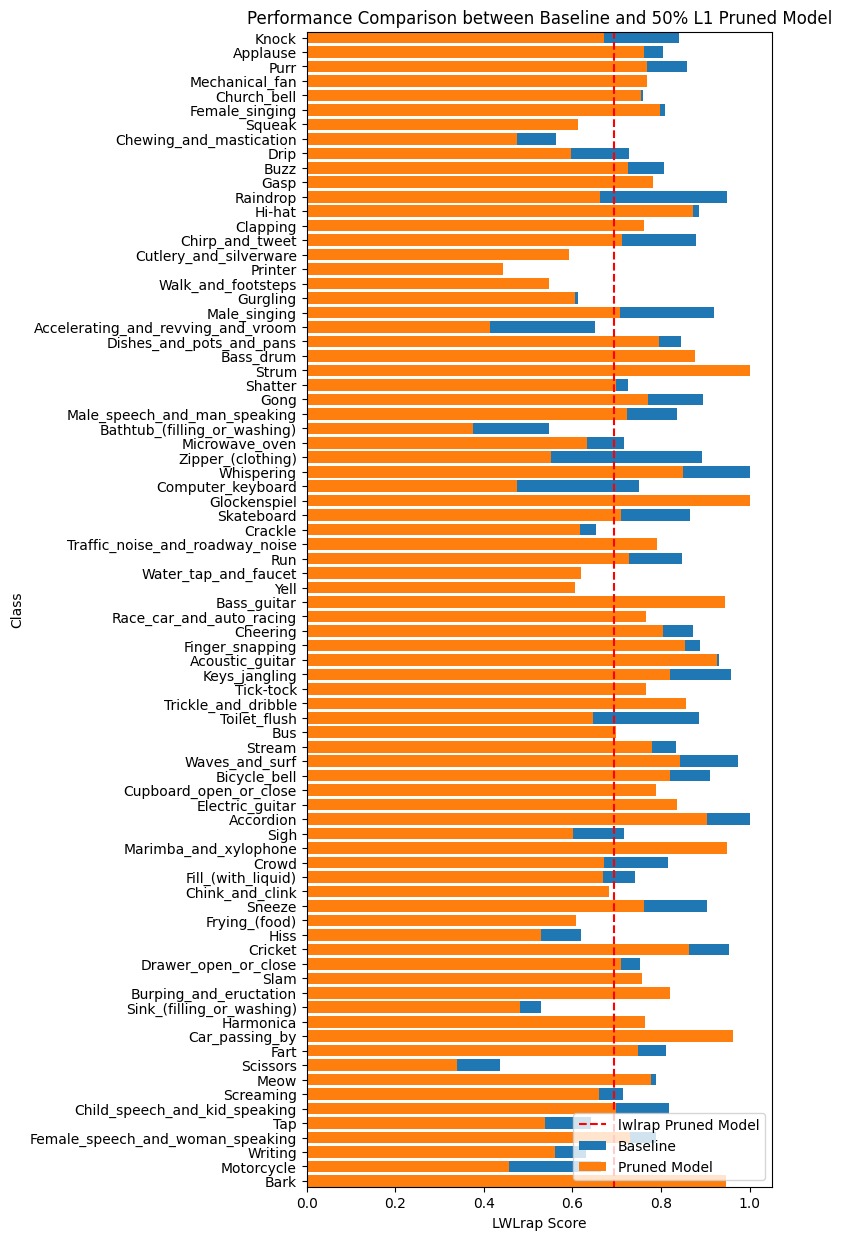

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


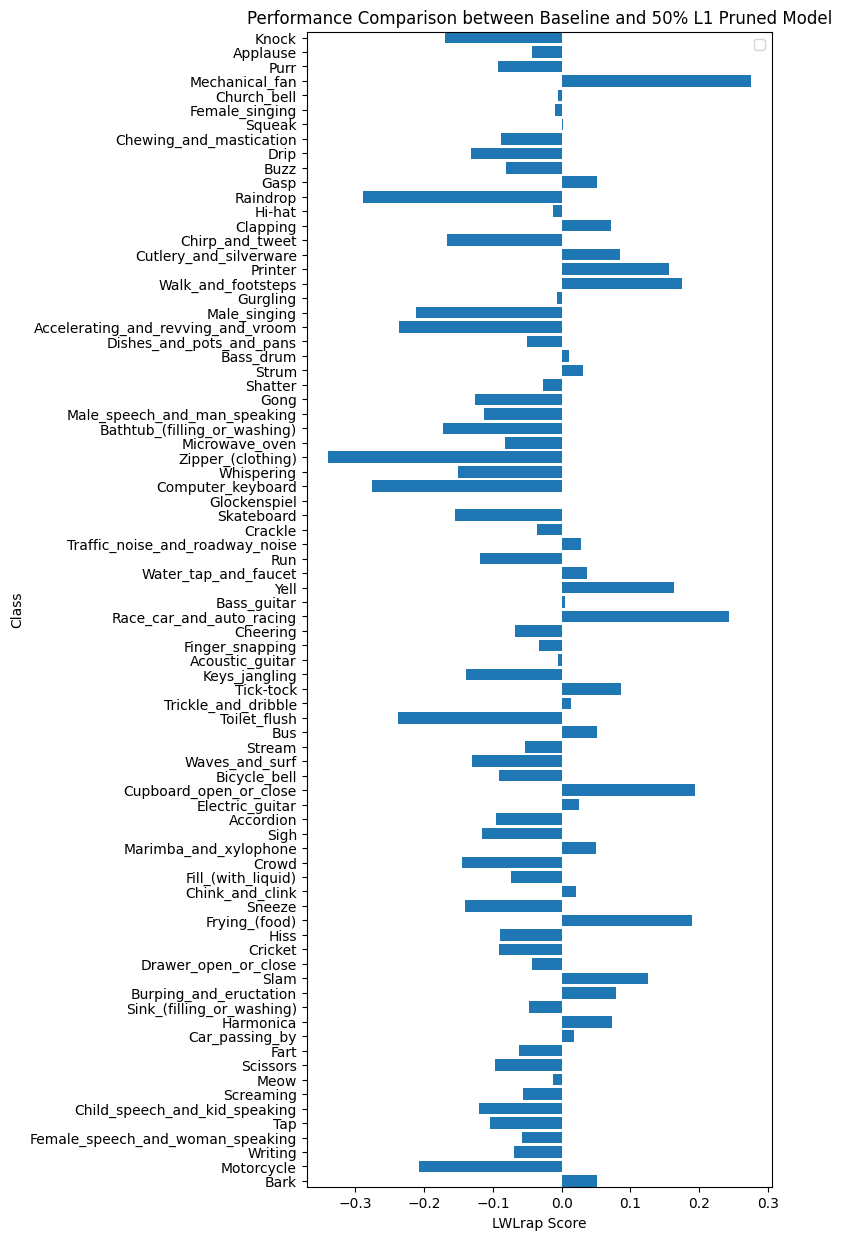

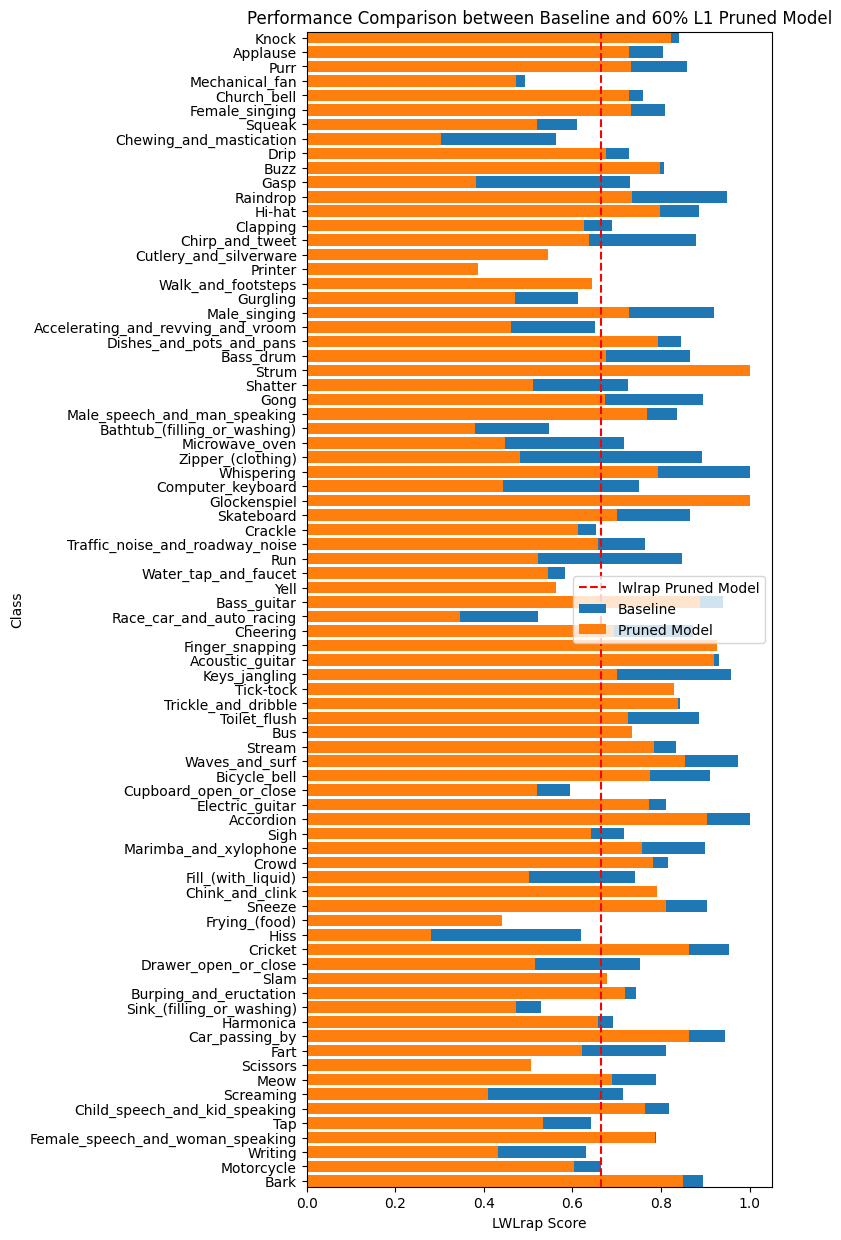

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


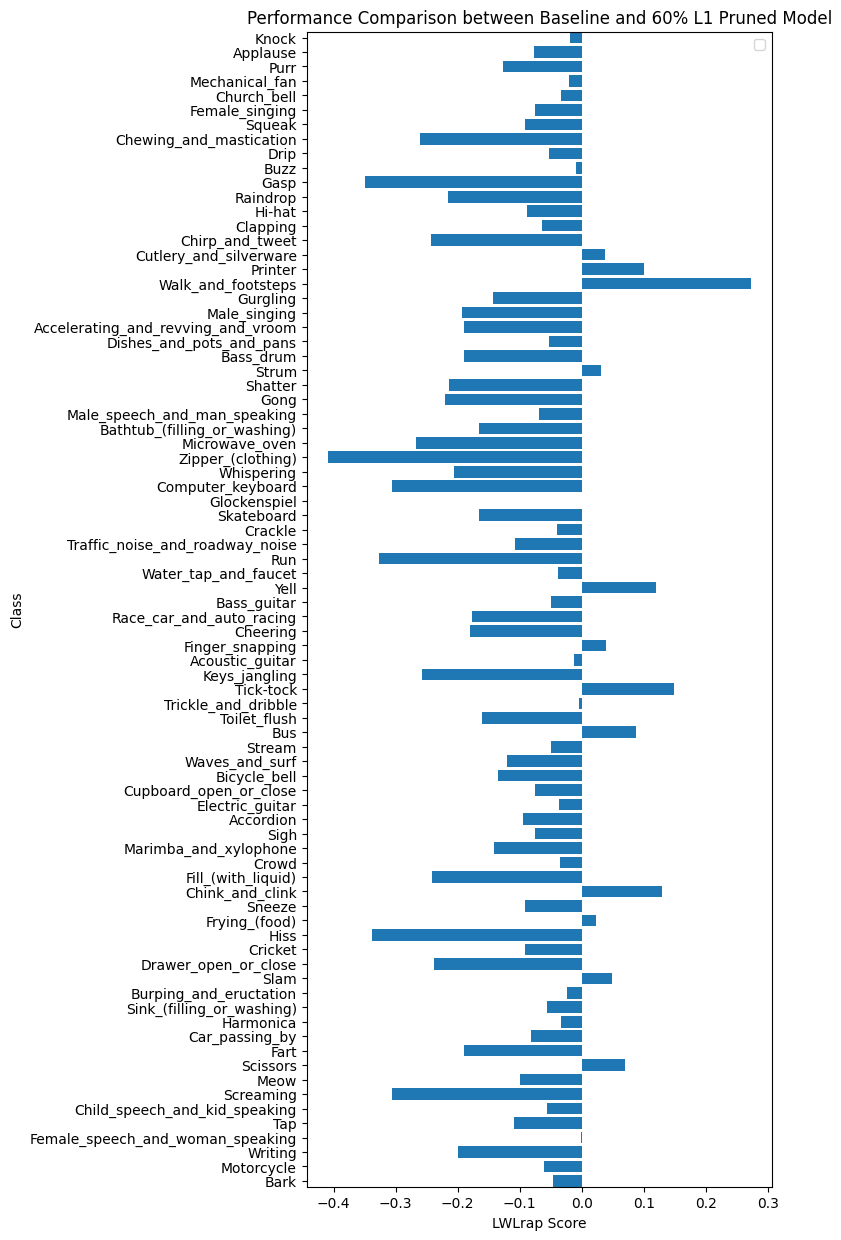

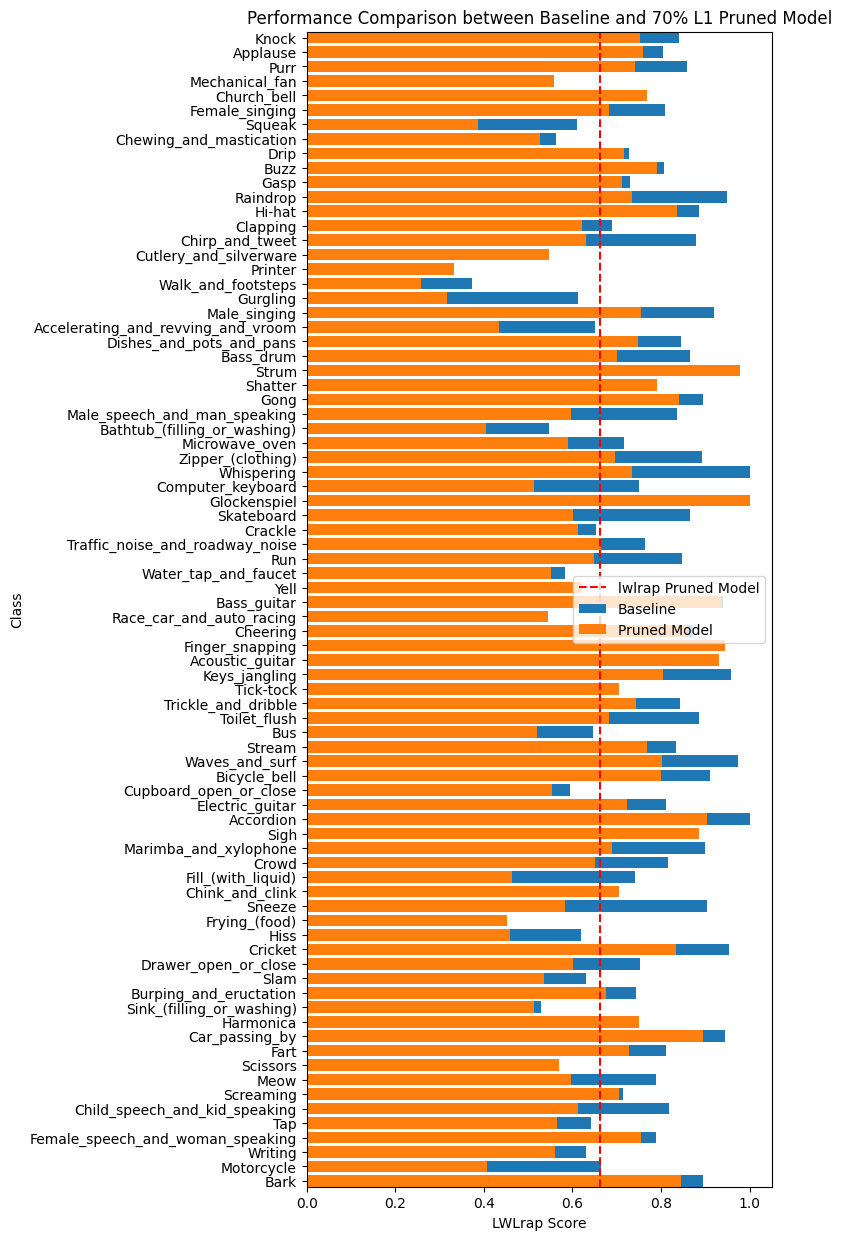

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


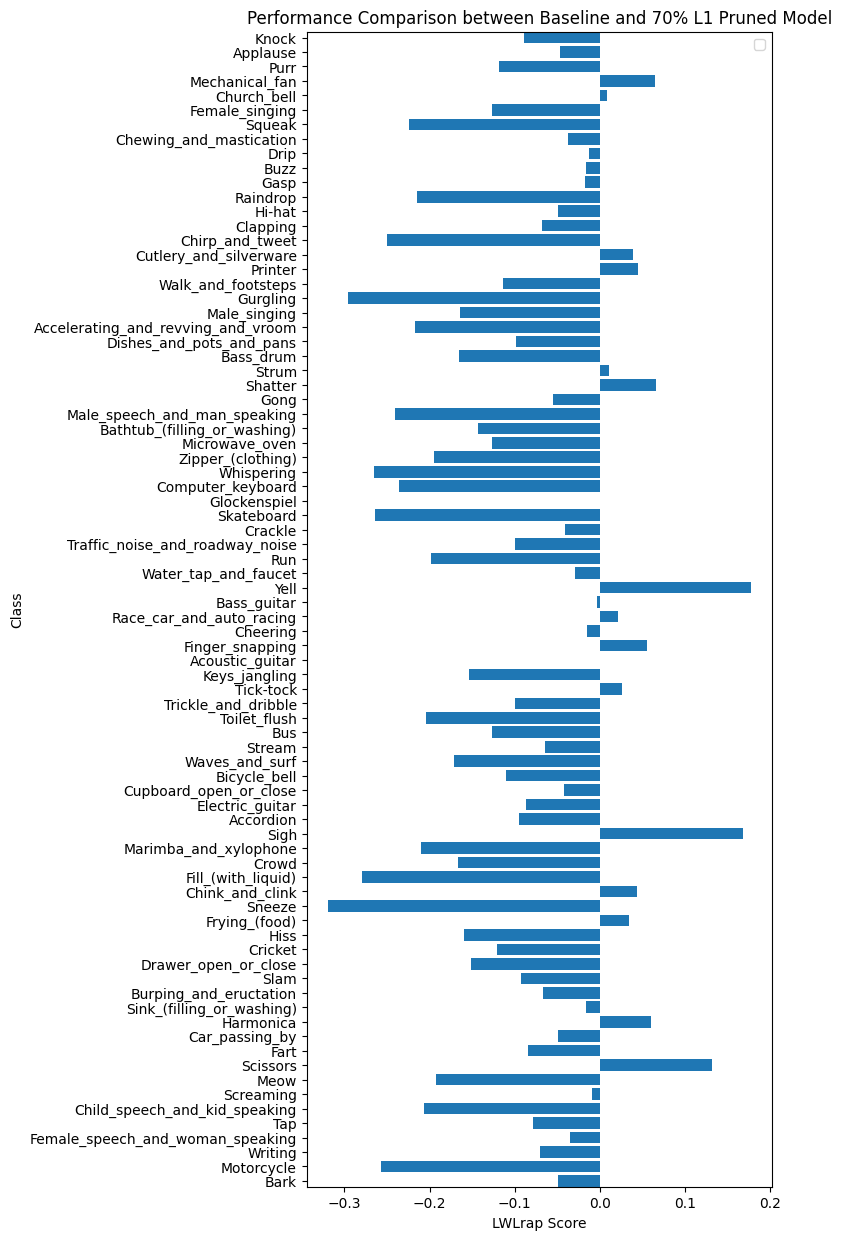

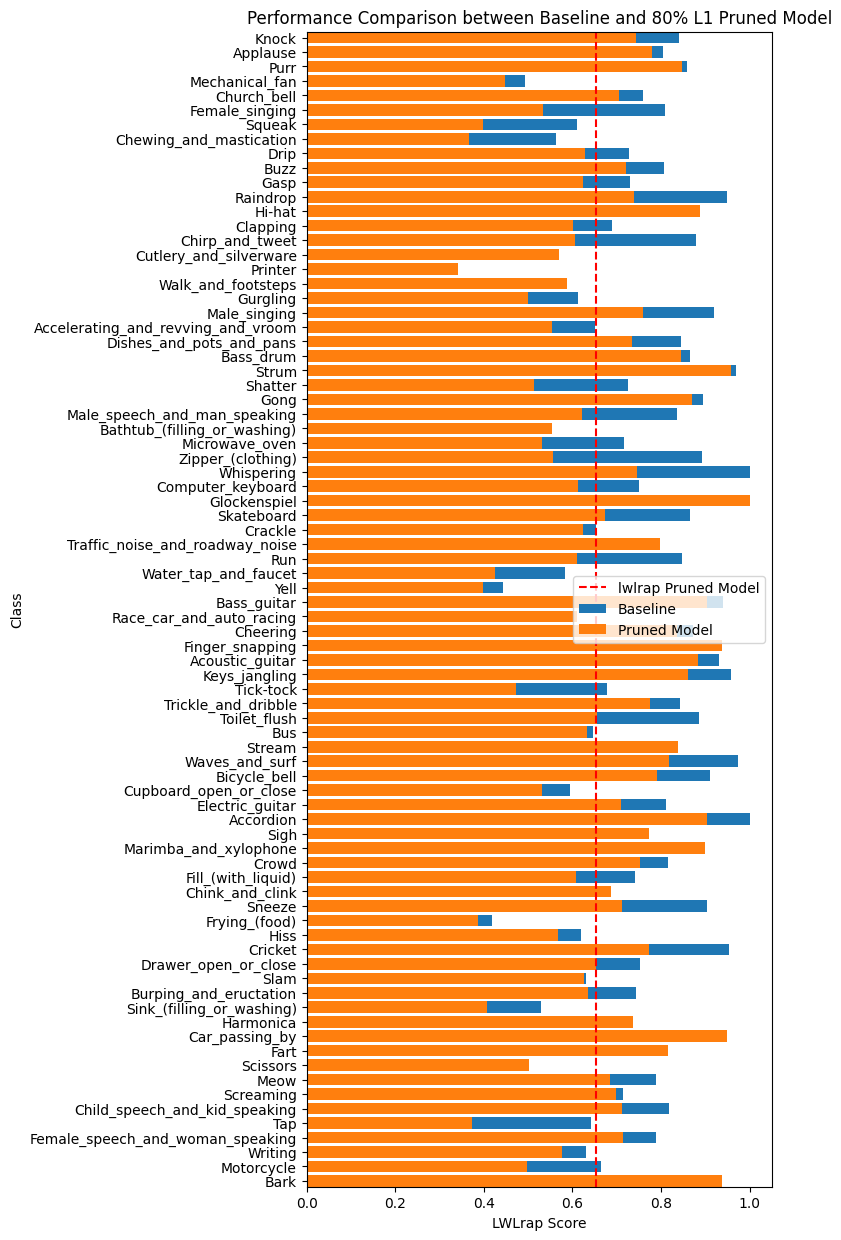

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


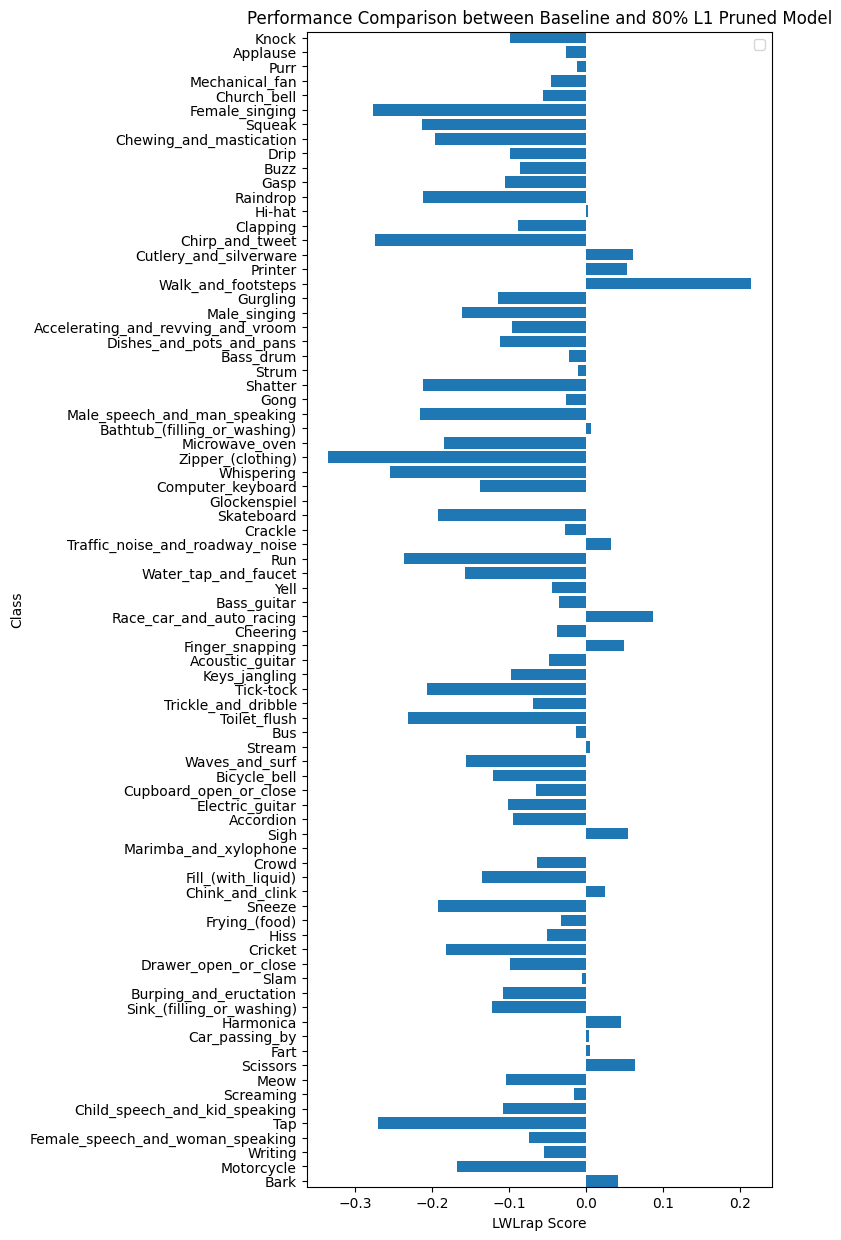

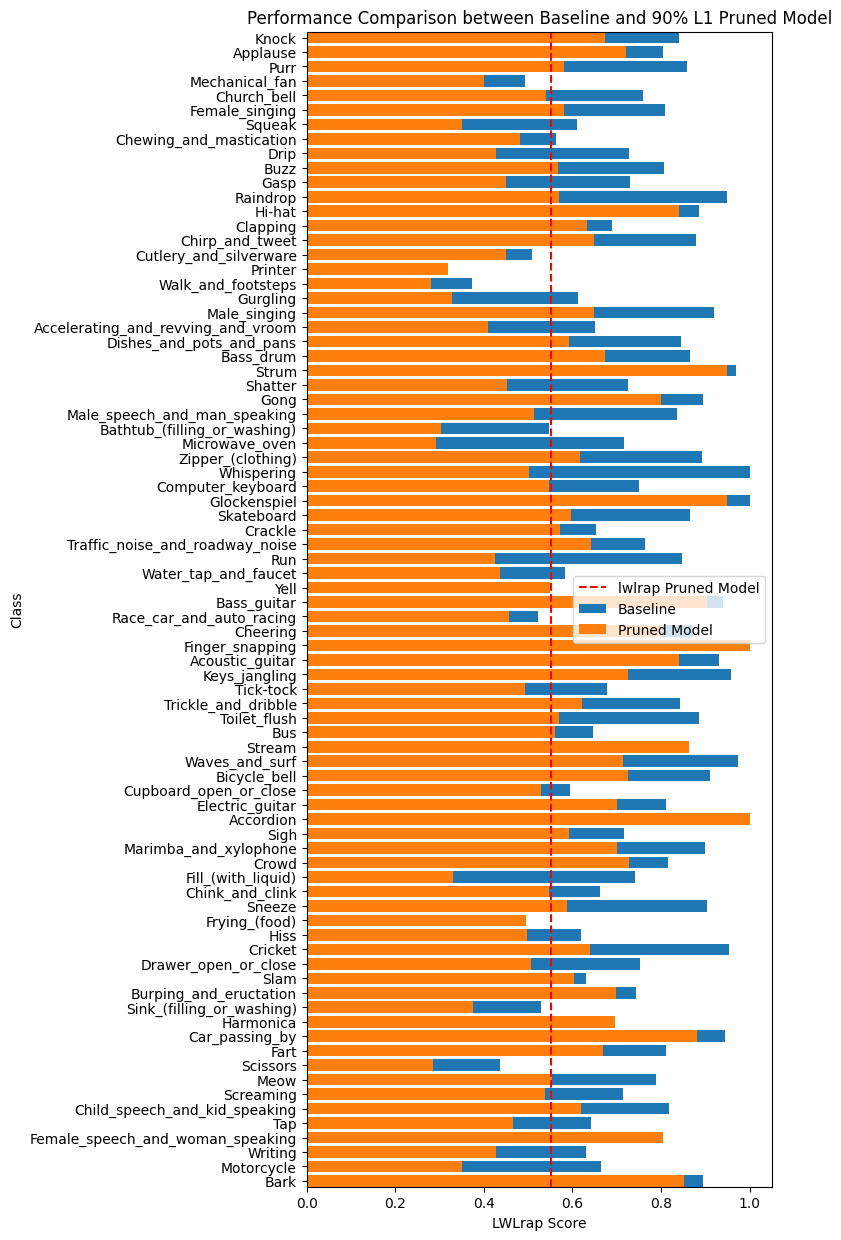

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


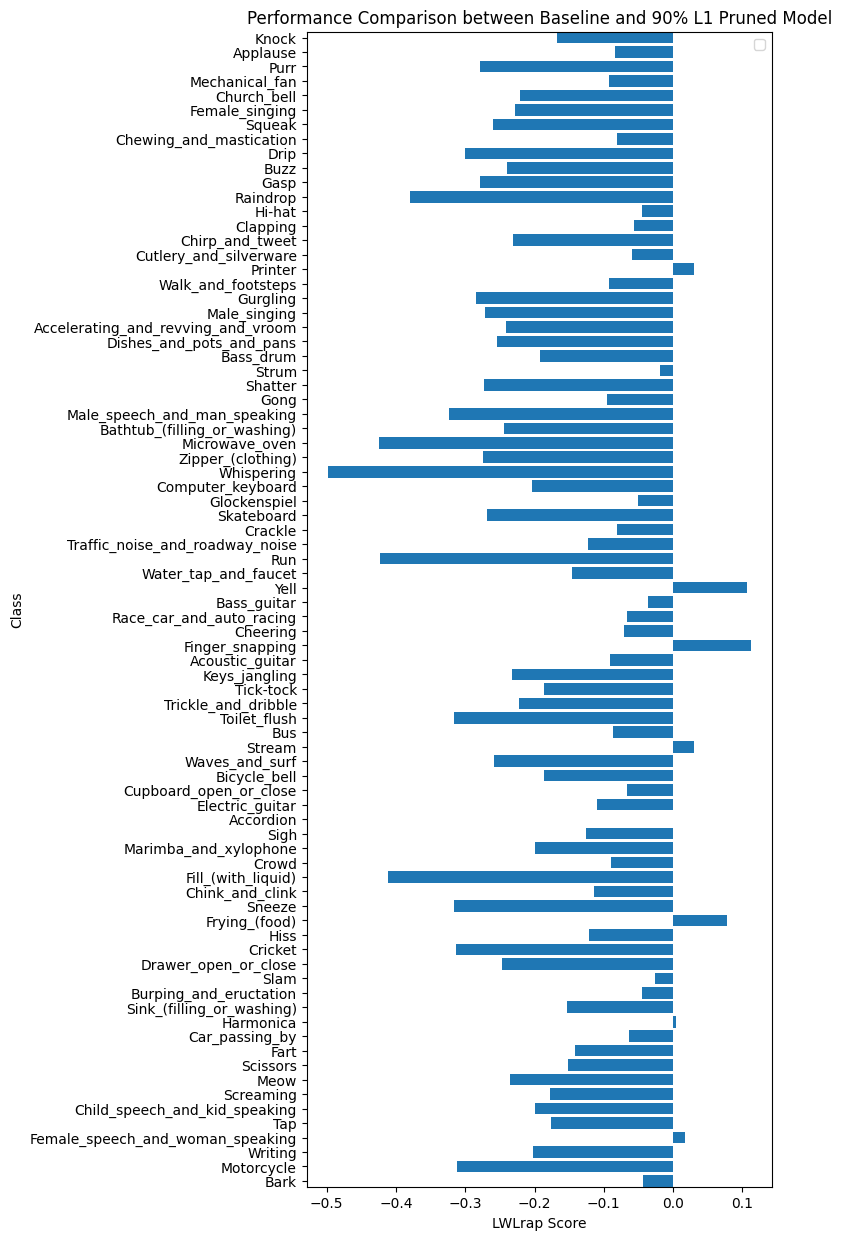

In [131]:
percentage = 50
for i, model in enumerate(l1):
    plot_performance(baseline, model, classes, l1_lwlrap[i], percentage)
    plot_difference(baseline, model, classes, percentage)
    percentage += 10

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


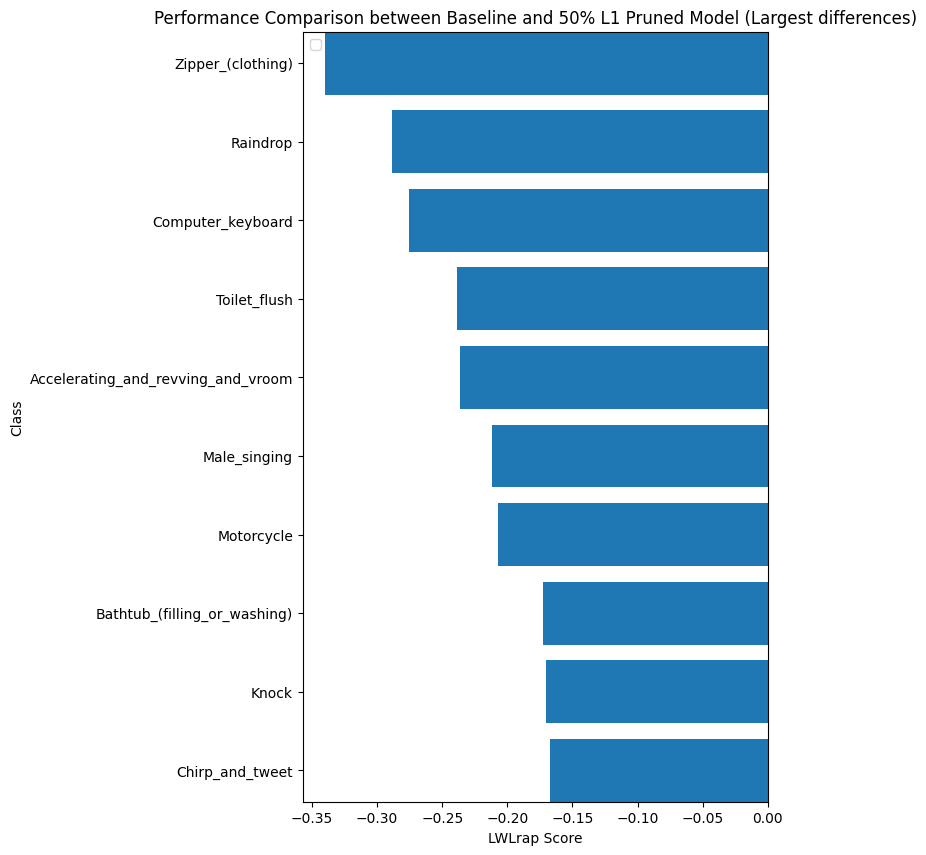

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


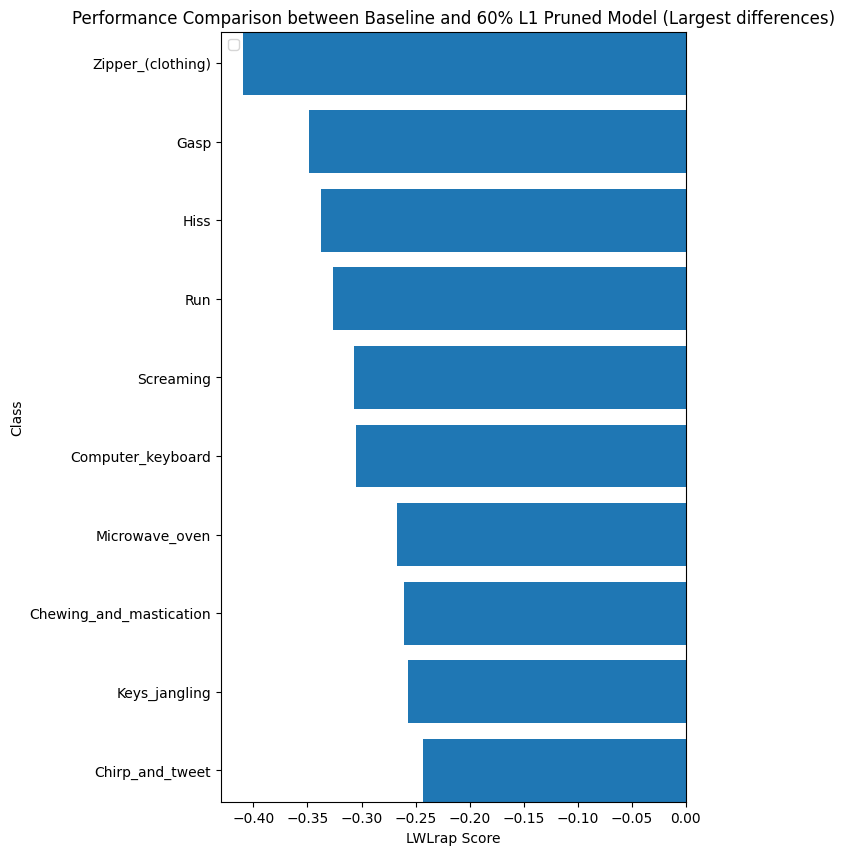

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


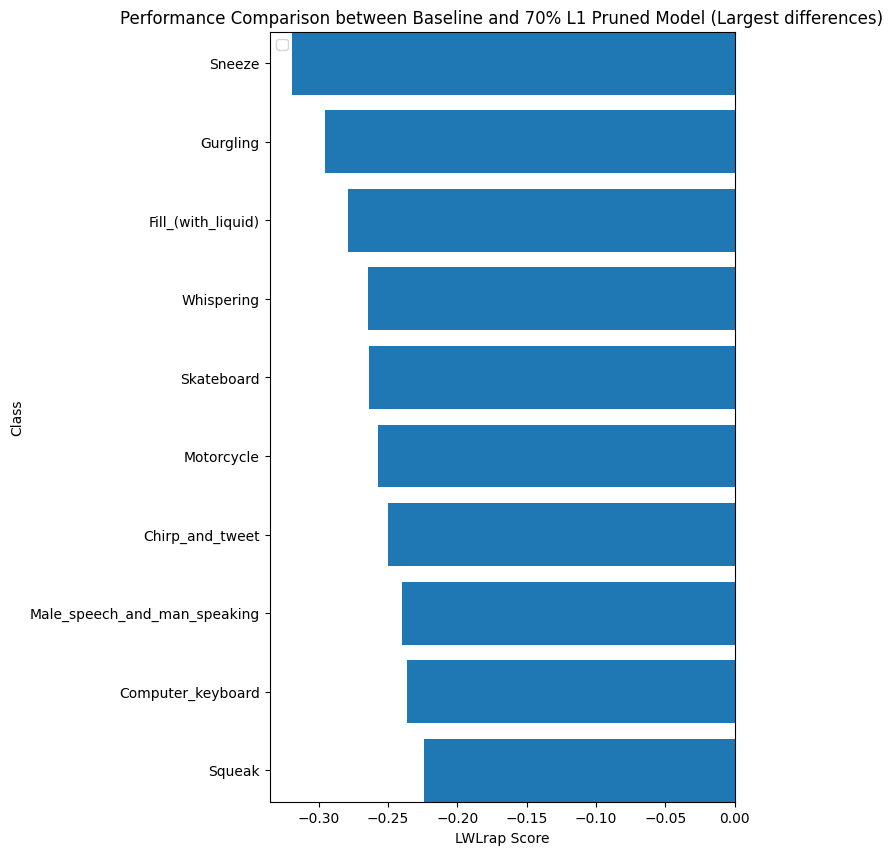

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


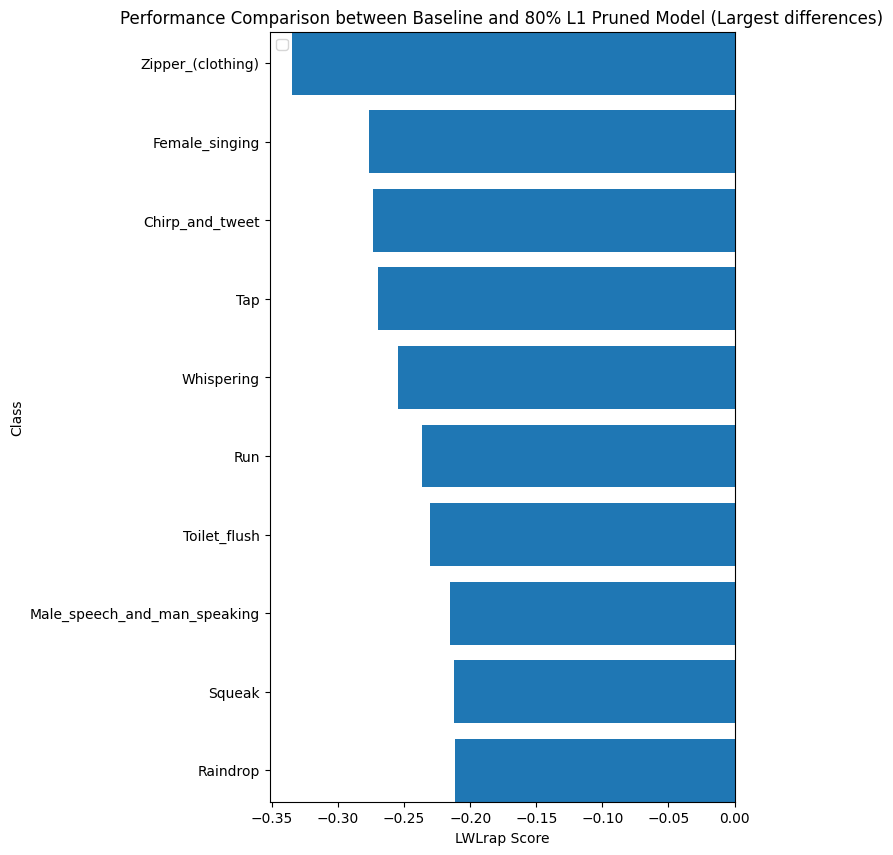

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


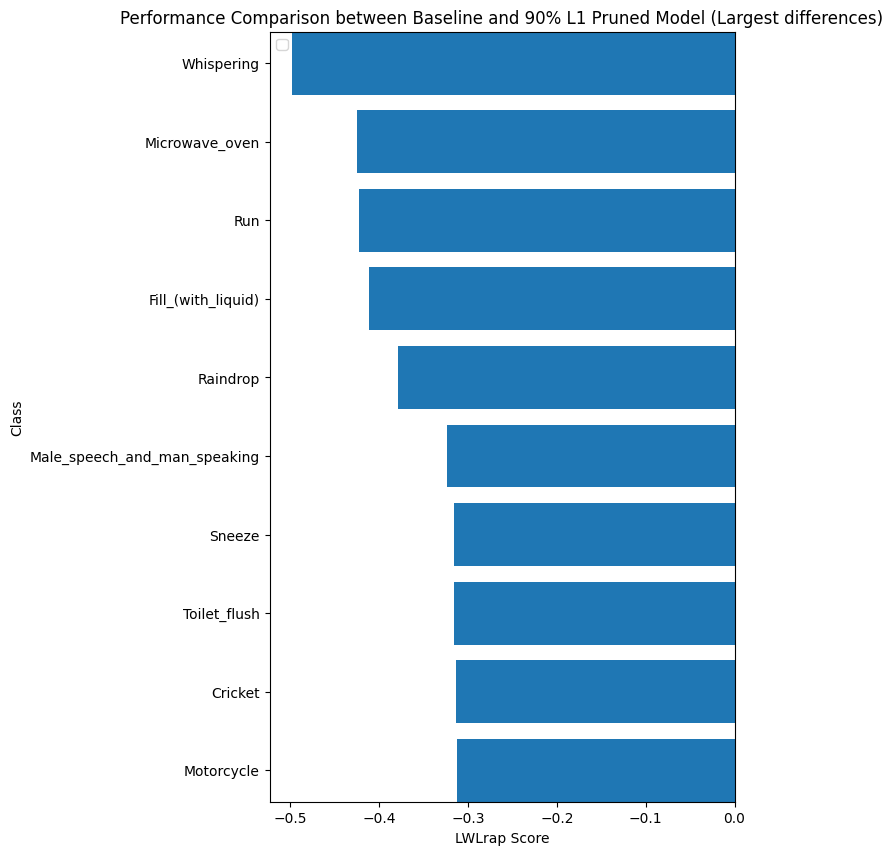

In [137]:
percentage = 50
for i, model in enumerate(l1):
    plot_difference(baseline, model, classes, percentage, top_10=True)
    percentage += 10